In [48]:
# Imports required
import torch
import librosa
import librosa.display
import pickle
import numpy as np
import matplotlib.pyplot as plt
import torch.nn as nn

In [49]:
# File Path and converting audio file to binary data
file = "Data Samples/disco18.wav"
y, sr = librosa.load(file, duration=3, offset=0)

In [50]:
# Function to plot graph of the audio file
def plot_sound(y, sr):
    plt.figure(figsize=(14, 5))
    print("length {}, sample-rate {}".format(y.shape, sr))
    librosa.display.waveshow(y, sr=sr)

length (66150,), sample-rate 22050


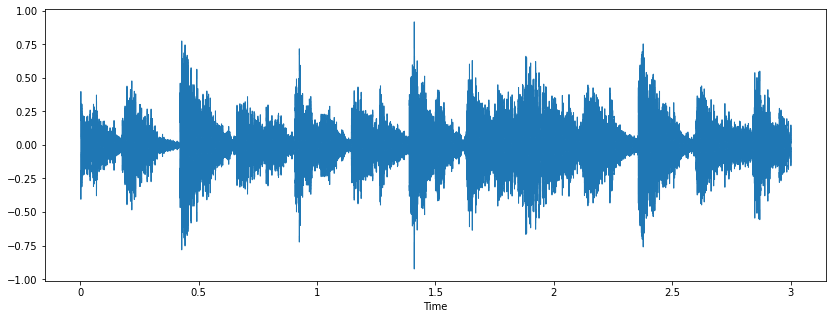

In [51]:
# Plot of sound Amplitude Graph
plot_sound(y, sr)

In [52]:
# Function to plot spectrogram of the audio file
def plot_spectrogram(y, sr):
    Y = librosa.stft(y)
    Ydb = librosa.amplitude_to_db(abs(Y))
    plt.figure(figsize=(14, 6))
    librosa.display.specshow(Ydb, sr=sr, x_axis='time', y_axis='hz')
    plt.colorbar()

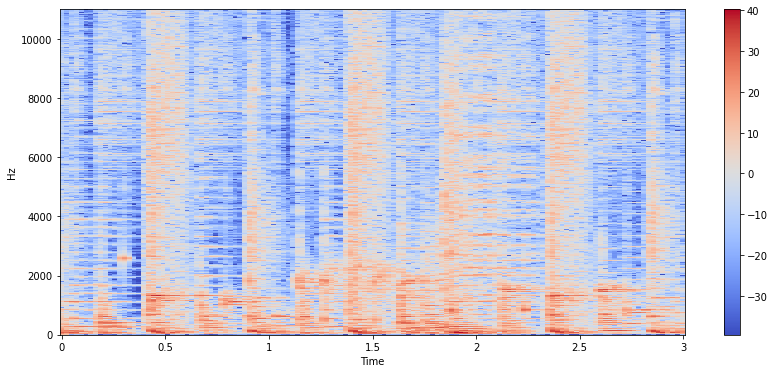

In [53]:
# Plot of Spectogram
plot_spectrogram(y, sr)

In [54]:
# Function to add features to the list and keep track of feature extraction
def addToList(arr, name, value):
    print(f"{name}: {value}")
    arr.append(value)

In [55]:
# Function to extract features
def extract_features(y, sr):
    # Length of track is added as default parameter for no reason (becomes 0 for all tracks on nomralization)
    arr = [66149]

    # chroma_stft mean and variance values
    chroma_stft = librosa.feature.chroma_stft(y=y, sr=sr)
    addToList(arr, "chroma_stft_mean", np.mean(chroma_stft))
    addToList(arr, "chroma_stft_var", np.var(chroma_stft))

    # rms mean and variance values
    rms = librosa.feature.rms(y=y)
    addToList(arr, "rms_mean", np.mean(rms))
    addToList(arr, "rms_var", np.var(rms))

    # spectral_centroid mean and variance values
    spectral_centroid = librosa.feature.spectral_centroid(y=y, sr=sr)
    addToList(arr, "spectral_centroid_mean", np.mean(spectral_centroid))
    addToList(arr, "spectral_centroid_var", np.var(spectral_centroid))

    # spectral_bandwidth mean and variance values
    spectral_bandwidth = librosa.feature.spectral_bandwidth(y=y, sr=sr)
    addToList(arr, "spectral_bandwidth_mean", np.mean(spectral_bandwidth))
    addToList(arr, "spectral_bandwidth_var", np.var(spectral_bandwidth))

    # spectral_rolloff mean and variance values
    spectral_rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr)
    addToList(arr, "spectral_rolloff_mean", np.mean(spectral_rolloff))
    addToList(arr, "spectral_rolloff_var", np.var(spectral_rolloff))

    # zero_crossing_rate mean and variance values
    zero_crossing_rate = librosa.feature.zero_crossing_rate(y=y)
    addToList(arr, "zero_crossing_rate_mean", np.mean(zero_crossing_rate))
    addToList(arr, "zero_crossing_rate_var", np.var(zero_crossing_rate))

    # harmony mean and variance values
    harmony = librosa.effects.harmonic(y=y)
    addToList(arr, "harmony_mean", np.mean(harmony))
    addToList(arr, "harmony_var", np.var(harmony))

    # tempo mean and variance values
    tempo = librosa.beat.tempo(y=y, sr=sr)[0]
    addToList(arr, "tempo", tempo)

    # mfcc mean and variance values from 1 to 20
    for i in range(1, 21):
        mfcc = librosa.feature.mfcc(y=y, sr=sr)[i-1]
        addToList(arr, f"mfcc{i}_mean", np.mean(mfcc))                
        addToList(arr, f"mfcc{i}_var", np.var(mfcc))
    
    return arr

In [56]:
# Extracting Features from the data
arr = extract_features(y, sr)

chroma_stft_mean: 0.3856496214866638
chroma_stft_var: 0.08204984664916992
rms_mean: 0.11560767889022827
rms_var: 0.0016990189906209707
spectral_centroid_mean: 3179.1121564955747
spectral_centroid_var: 457314.7731246597
spectral_bandwidth_mean: 3098.015831323601
spectral_bandwidth_var: 65508.355065312004
spectral_rolloff_mean: 7229.6901292067305
spectral_rolloff_var: 998950.125036296
zero_crossing_rate_mean: 0.146826171875
zero_crossing_rate_var: 0.0035886715008662294
harmony_mean: -2.0429110008990392e-05
harmony_var: 0.004365336149930954
tempo: 123.046875
mfcc1_mean: -88.16875457763672
mfcc1_var: 4207.2255859375
mfcc2_mean: 66.9168701171875
mfcc2_var: 564.7034912109375
mfcc3_mean: 15.278854370117188
mfcc3_var: 496.8034362792969
mfcc4_mean: 1.501997470855713
mfcc4_var: 604.0690307617188
mfcc5_mean: 6.9752655029296875
mfcc5_var: 223.06866455078125
mfcc6_mean: 13.01681900024414
mfcc6_var: 121.97135925292969
mfcc7_mean: 2.680954694747925
mfcc7_var: 184.2772216796875
mfcc8_mean: 5.969602584

In [57]:
# Loading the scaler saved during model training
with open('Scalers/std_scaler.pickle', 'rb') as handle:
    stdscaler = pickle.load(handle)

# Normalizing the features using the scaler
arr = stdscaler.transform([arr])

C:\Users\agraw\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [58]:
# PyTorch models inherit from torch.nn.Module
class CnnClassifier(nn.Module):
    def __init__(self):
        super(CnnClassifier, self).__init__()
        
        # Number of input features is 12.
        self.layer_1 = nn.Linear(56, 64) 
        self.layer_2 = nn.Linear(64, 128)
        self.layer_3 = nn.Linear(128, 128)
        self.layer_4 = nn.Linear(128, 128)
        self.layer_5 = nn.Linear(128, 64)
        self.layer_out = nn.Linear(64, 10) 
        
        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()
        self.dropout = nn.Dropout(p=0.1)
        self.batchnorm1 = nn.BatchNorm1d(64)
        self.batchnorm2 = nn.BatchNorm1d(128)
        self.batchnorm3 = nn.BatchNorm1d(128)
        self.batchnorm4 = nn.BatchNorm1d(128)
        self.batchnorm5 = nn.BatchNorm1d(64)

    def forward(self, inputs):
        x = self.relu(self.layer_1(inputs))
        x = self.batchnorm1(x)
        x = self.relu(self.layer_2(x))
        x = self.batchnorm2(x)
        x = self.relu(self.layer_3(x))
        x = self.batchnorm3(x)
        x = self.relu(self.layer_4(x))
        x = self.batchnorm4(x)
        x = self.relu(self.layer_5(x))
        x = self.batchnorm5(x)
        
        x = self.dropout(x)
        x = self.layer_out(x)
        x = self.sigmoid(x)
        
        return x

In [59]:
# Labels for prediction
label = ['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz', 'metal', 'pop', 'reggae', 'rock']

In [60]:
# Prediction function
def get_genre(model, arr):
    # Converting arr into tensor for passing to model
    arr = torch.tensor(arr)
    
    # Getting the prediction array
    preds_array = model(arr.float())

    # Converting preds array into numpy array
    pred_array = preds_array.detach().numpy()[0]

    # Finding the index of the most probable element
    max_element = np.max(pred_array)
    preds = np.where(pred_array == max_element)
    print(preds)

    print(label[preds[0][0]])

In [61]:
# Getting an instance of the model
model = CnnClassifier()

# Loading the model from binary file
model.load_state_dict(torch.load("Models/CNN.pth"))

# Setting the model into evaluation mode
model.eval()

# Running prediction
get_genre(model, arr)

(array([3], dtype=int64),)
disco
